# An Empirical Comparison of Supervised and Self-Supervised Learning

In [1]:
import tqdm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from sklearn.svm import SVC
from sklearn.manifold import TSNE

from train import train_encoder, train_ConvNet, TrainArgs
from test import encode_data, plot_tsne, test_conv

from torch.utils.data import Subset

In [2]:
%load_ext autoreload
%autoreload 2

## Baseline: convolutional neural network

In [3]:
conv_args = TrainArgs(batchsize = 10)

In [4]:
ConvNet, conv_losses = train_ConvNet(conv_args)

Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.302
[epoch: 0, i:   999] avg mini-batch loss: 2.301
[epoch: 1, i:   499] avg mini-batch loss: 2.294
[epoch: 1, i:   999] avg mini-batch loss: 2.279
[epoch: 2, i:   499] avg mini-batch loss: 2.205
[epoch: 2, i:   999] avg mini-batch loss: 2.140
[epoch: 3, i:   499] avg mini-batch loss: 1.915
[epoch: 3, i:   999] avg mini-batch loss: 1.830
[epoch: 4, i:   499] avg mini-batch loss: 1.739
[epoch: 4, i:   999] avg mini-batch loss: 1.706
[epoch: 5, i:   499] avg mini-batch loss: 1.627
[epoch: 5, i:   999] avg mini-batch loss: 1.570
[epoch: 6, i:   499] avg mini-batch loss: 1.522
[epoch: 6, i:   999] avg mini-batch loss: 1.484
[epoch: 7, i:   499] avg mini-batch loss: 1.419
[epoch: 7, i:   999] avg mini-batch loss: 1.435
[epoch: 8, i:   499] avg mini-batch loss: 1.365
[epoch: 8, i:   999] avg mini-batch loss: 1.345
[epoch: 9, i:   499] avg mini-batch loss: 1.

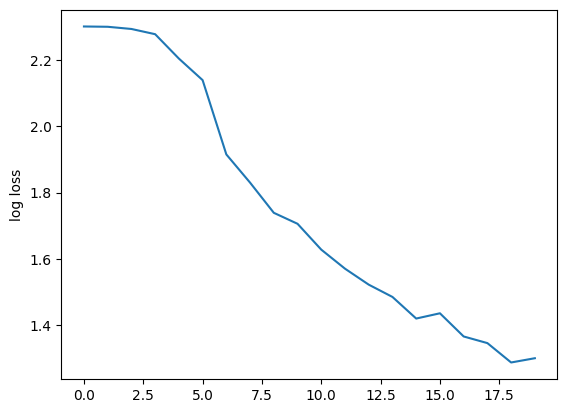

In [5]:
plt.plot(conv_losses);
plt.ylabel('log loss');

In [6]:
print(f'Baseline accuracy of the convolutional model is {test_conv(ConvNet)*100} %')

Files already downloaded and verified
Files already downloaded and verified
Baseline accuracy of the convolutional model is 49.885416666666664 %


## Momentum Contrast

### Pre-Training the Encoder

In [7]:
encoder_args = TrainArgs(epochs = 20)

In [8]:
encoder, enc_losses = train_encoder(encoder_args)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Train Epoch: 1 	Loss: 0.047525
Train Epoch: 2 	Loss: 0.032792
Train Epoch: 3 	Loss: 0.024361
Train Epoch: 4 	Loss: 0.018544
Train Epoch: 5 	Loss: 0.014461
Train Epoch: 6 	Loss: 0.011508
Train Epoch: 7 	Loss: 0.009466
Train Epoch: 8 	Loss: 0.008038
Train Epoch: 9 	Loss: 0.006800
Train Epoch: 10 	Loss: 0.006097
Train Epoch: 11 	Loss: 0.005440
Train Epoch: 12 	Loss: 0.004934
Train Epoch: 13 	Loss: 0.004671
Train Epoch: 14 	Loss: 0.004214
Train Epoch: 15 	Loss: 0.003982
Train Epoch: 16 	Loss: 0.003796
Train Epoch: 17 	Loss: 0.003564
Train Epoch: 18 	Loss: 0.003360
Train Epoch: 19 	Loss: 0.003269
Train Epoch: 20 	Loss: 0.003275


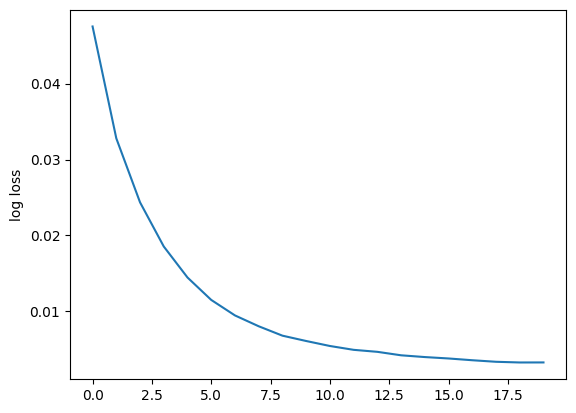

In [9]:
plt.plot(enc_losses);
plt.ylabel('log loss');

### Visualizing Embeddings

To do:
1. Implement multiple training ratios
2. Hyperparameter tuning?
3. Plot the loss functions

In [10]:
data, targets = encode_data()

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 48000/48000 [09:20<00:00, 85.64it/s]


In [11]:
ret = TSNE(n_components=2, random_state=0, n_jobs=8).fit_transform(data)

Files already downloaded and verified
Files already downloaded and verified


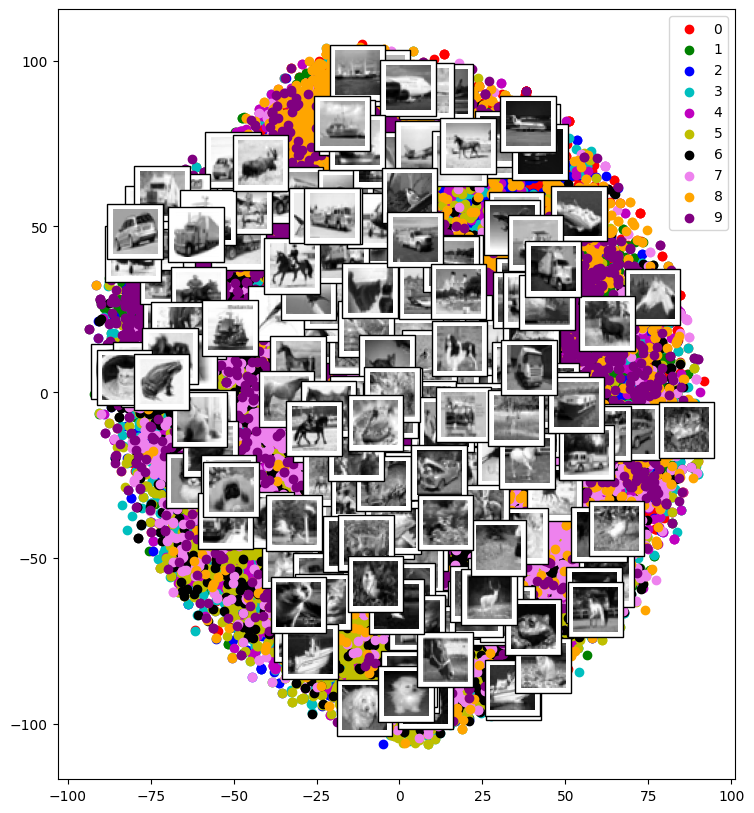

In [12]:
plot_tsne(targets, ret)

### Training SVM on freezed features

In [13]:
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 12000/12000 [02:19<00:00, 86.14it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 48000/48000 [09:18<00:00, 85.95it/s]


In [14]:
svm = SVC(C = 100,  gamma='scale')
svm.fit(X_train, y_train)

SVC(C=100)

In [15]:
svm.score(X_test, y_test)

0.5619791666666667

### Multiple Runs

In [20]:
# subsample so things run faster
X_train, y_train = encode_data(train=True)
X_test, y_test = encode_data(train=False)

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 12000/12000 [02:18<00:00, 86.45it/s]


Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 48000/48000 [09:16<00:00, 86.29it/s]


In [21]:
conv_args = TrainArgs(batchsize = 10, epochs = 5)

In [23]:
n = 3
conv_errors = []
svm_errors = []
for i in range(n):
    ConvNet, conv_losses = train_ConvNet(conv_args, subsample=False)
    conv_errors.append(test_conv(ConvNet, subsample=False)*100)
    
    svm = SVC(C = 100,  gamma='scale')
    svm.fit(X_train, y_train)   
    svm_errors.append(svm.score(X_test, y_test))

Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 0, i:   999] avg mini-batch loss: 2.292
[epoch: 1, i:   499] avg mini-batch loss: 2.247
[epoch: 1, i:   999] avg mini-batch loss: 2.181
[epoch: 2, i:   499] avg mini-batch loss: 2.092
[epoch: 2, i:   999] avg mini-batch loss: 2.033
[epoch: 3, i:   499] avg mini-batch loss: 1.883
[epoch: 3, i:   999] avg mini-batch loss: 1.831
[epoch: 4, i:   499] avg mini-batch loss: 1.767
[epoch: 4, i:   999] avg mini-batch loss: 1.734
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Started looping
[epoch: 0, i:   499] avg mini-batch loss: 2.301
[epoch: 0, i:   999] avg mini-batch loss: 2.296
[epoch: 1, i:   499] avg mini-batch loss: 2.227
[epoch: 1, i:   999] avg mini-batch loss: 2.101
[epoch: 2, i:   499] avg mini-batch loss: 2.005
[epoch: 2, i:   999]

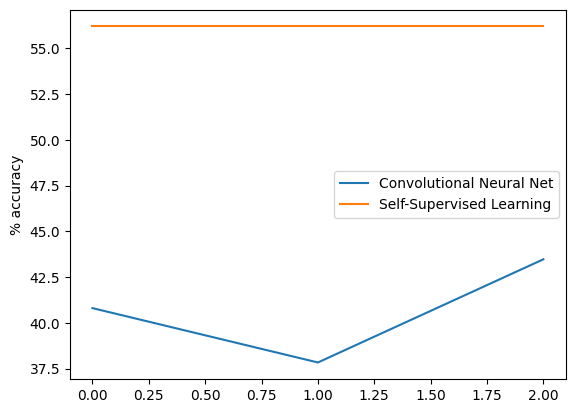

In [24]:
plt.plot(np.array(conv_errors), label="Convolutional Neural Net")
plt.plot(np.array(svm_errors)*100, label="Self-Supervised Learning")
plt.legend()
plt.ylabel('% accuracy')
plt.savefig('./results/comparison.png')

In [25]:
conv_errors

[40.80833333333334, 37.8375, 43.475]

In [26]:
svm_errors

[0.5619791666666667, 0.5619791666666667, 0.5619791666666667]

In [27]:
conv_errors

[40.80833333333334, 37.8375, 43.475]